In [22]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define key variables (replace placeholders with your actual values)
num_classes = 3  # Replace with the actual number of classes in your dataset
train_data_dir = 'C:/Users/mdzid/Downloads/train'  # Replace with the path to your training images
validation_data_dir = 'C:/Users/mdzid/Downloads/val' # Replace with the path to your validation images
test_data_dir = 'C:/Users/mdzid/Downloads/test' 
# Load the pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Adjust the number of neurons as needed
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Optionally freeze the VGG16 base layers
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ... rest of the code remains the same ...


# Prepare image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Optionally save the trained model
model.save('vgg16.h5')


Found 1738 images belonging to 3 classes.
Found 96 images belonging to 3 classes.
Found 96 images belonging to 3 classes.
Epoch 1/50
55/55 [==============================] - 404s 7s/step - loss: 0.7068 - accuracy: 0.7250 - val_loss: 0.5866 - val_accuracy: 0.7500
Epoch 2/50
55/55 [==============================] - 399s 7s/step - loss: 0.4565 - accuracy: 0.8176 - val_loss: 0.5471 - val_accuracy: 0.7292
Epoch 3/50
55/55 [==============================] - 396s 7s/step - loss: 0.3756 - accuracy: 0.8665 - val_loss: 0.4778 - val_accuracy: 0.7812
Epoch 4/50
55/55 [==============================] - 399s 7s/step - loss: 0.3222 - accuracy: 0.8820 - val_loss: 0.5336 - val_accuracy: 0.7396
Epoch 5/50
55/55 [==============================] - 396s 7s/step - loss: 0.3242 - accuracy: 0.8774 - val_loss: 0.4565 - val_accuracy: 0.8229
Epoch 6/50
55/55 [==============================] - 397s 7s/step - loss: 0.2739 - accuracy: 0.9005 - val_loss: 0.3796 - val_accuracy: 0.8333
Epoch 7/50
55/55 [==============

C:\Users\mdzid\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

def predict_image(model_path, img_path, class_names):
    # Load the trained model
    model = load_model(model_path)

    # Load and preprocess the image using OpenCV
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalize pixel values

    # Reshape the image to match the model's expected input shape
    img_array = np.expand_dims(img, axis=0)

    # Make a prediction
    predictions = model.predict(img_array)

    # Get predicted class index and name
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]

    # Get class probabilities
    class_probabilities = {class_names[i]: predictions[0][i] for i in range(len(class_names))}

    return predicted_class, class_probabilities

# Replace these values with your actual model path, image path, and class names
model_path = 'vgg16.h5'
img_path = r'C:\Users\mdzid\Downloads\f.jpg' 
class_names = ['Black Spot', 'Downy Mildew', 'Fresh Leaf']

predicted_class, class_probabilities = predict_image(model_path, img_path, class_names)

# Print the predicted class and class probabilities
print(f'Predicted class: {predicted_class}')
for class_name, probability in class_probabilities.items():
    print(f'Probability of {class_name}: {probability:.4f}')


1/1 [==============================] - 0s 427ms/step
Predicted class: Black Spot
Probability of Black Spot: 0.6366
Probability of Downy Mildew: 0.0009
Probability of Fresh Leaf: 0.3625


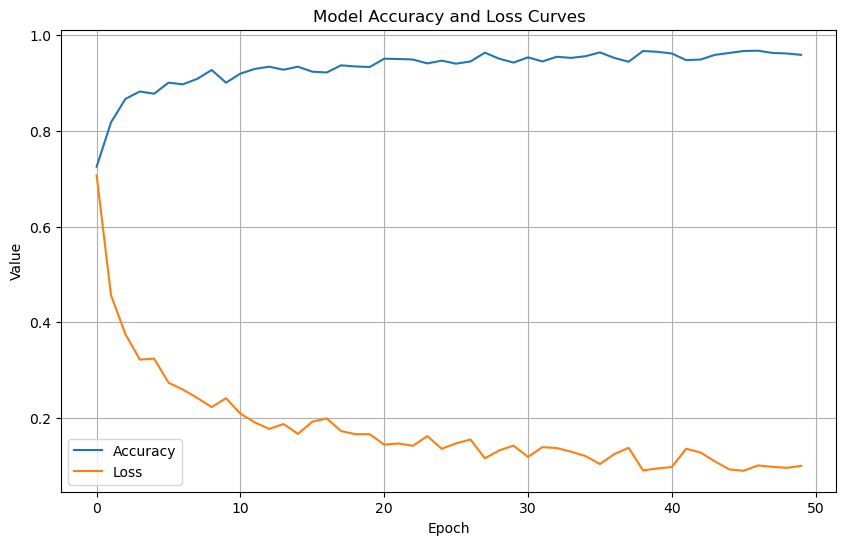

3/3 [==============================] - 19s 6s/step


In [30]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ... (previous code for model training and prediction) ...

# Plot accuracy and loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Model Accuracy and Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

# Generate predictions on validation or test data
validation_predictions = model.predict(validation_generator)  # Or use test_generator

